In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load dataset
# Dataset format: v1 = label (ham/spam), v2 = message
df = pd.read_csv("C:\\Users\\nisha\\Downloads\\archive (1).zip", encoding="latin-1")

# Keep only required columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels: ham → 0, spam → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print("✅ Dataset Loaded Successfully!")
print(df.head())

✅ Dataset Loaded Successfully!
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)


In [5]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [6]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)


📊 Naive Bayes Results:
Accuracy: 0.9668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



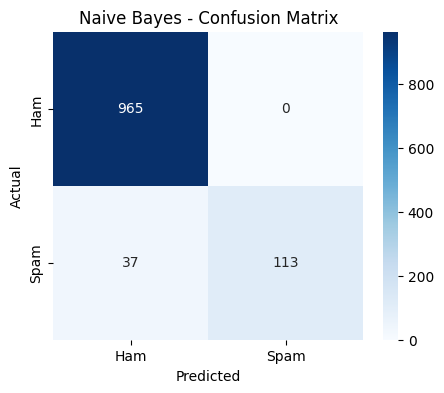


📊 Logistic Regression Results:
Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



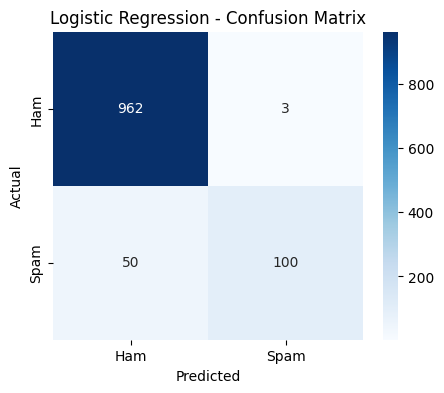


📊 Random Forest Results:
Accuracy: 0.9766816143497757
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



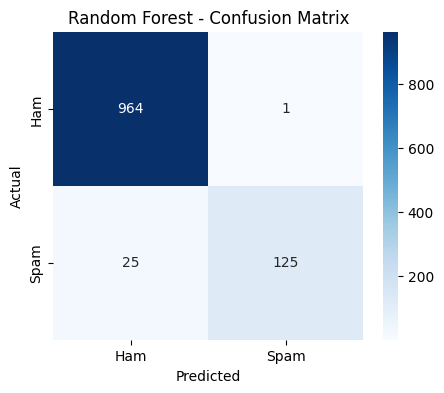

In [7]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Evaluate all models
evaluate_model("Naive Bayes", y_test, nb_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)

In [8]:
# Step 6: Test on custom messages
test_messages = [
    "Congratulations! You have won a $1000 Walmart gift card. Click here to claim now.",
    "Hi John, can we reschedule our meeting to tomorrow?",
    "URGENT! Your account has been compromised. Please verify your details immediately."
]

# Convert to TF-IDF and predict
test_tfidf = vectorizer.transform(test_messages)
predictions = nb_model.predict(test_tfidf)

print("\n🔍 Spam Predictions on Custom Messages:")
for msg, pred in zip(test_messages, predictions):
    label = "Spam" if pred == 1 else "Ham"
    print(f"Message: {msg}\n → Prediction: {label}\n")


🔍 Spam Predictions on Custom Messages:
Message: Congratulations! You have won a $1000 Walmart gift card. Click here to claim now.
 → Prediction: Spam

Message: Hi John, can we reschedule our meeting to tomorrow?
 → Prediction: Ham

Message: URGENT! Your account has been compromised. Please verify your details immediately.
 → Prediction: Ham

